In [153]:
import pandas as pd
import numpy as np

#INTRO:

#Buscamos si existe alguna relacion entre la cantidad de productos por oportunidad y el tiempo.
# Para el analisis solo nos quedaremos con las oportunidades ganadas.


data = pd.read_csv("Entrenamieto_ECI_2020.csv")
columns = ['Opportunity_ID', 'Stage', 'Opportunity_Created_Date']

df = data.loc[data.Stage == 'Closed Won', columns]

df['Opportunity_Created_Date'] = pd.to_datetime(df['Opportunity_Created_Date'], errors='coerce')
#Chequeamos que disponemos de fechas validas.
df['Opportunity_Created_Date'].isnull().sum()
df

,Opportunity_ID,Stage,Opportunity_Created_Date
1,1,Closed Won,2015-12-07
2,2,Closed Won,2015-12-08
7,7,Closed Won,2015-12-09
23,11,Closed Won,2015-12-09
63,20,Closed Won,2015-12-09
...,...,...,...
16937,12797,Closed Won,2015-12-04
16939,12799,Closed Won,2015-12-04
16942,12801,Closed Won,2015-12-04
16943,12801,Closed Won,2015-12-04


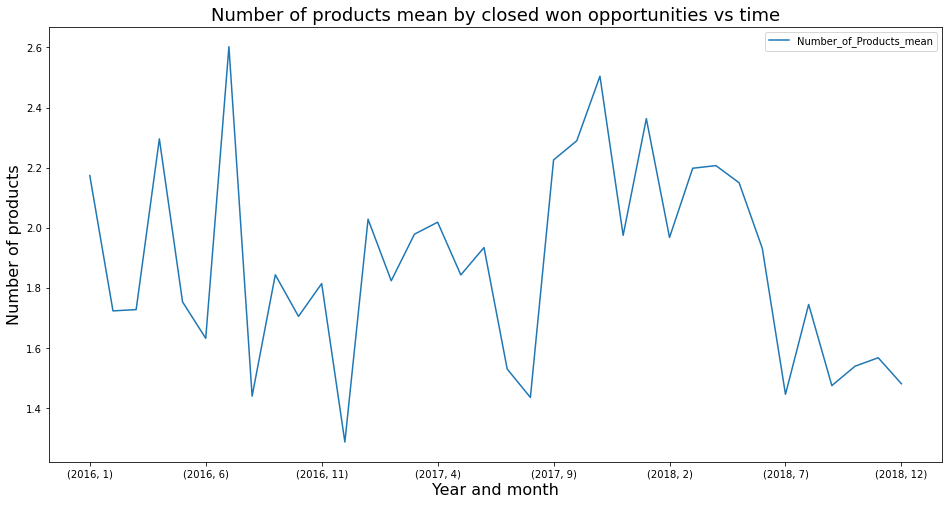

In [154]:
df['Year'] = df.Opportunity_Created_Date.dt.year.astype(int)
df['Month'] = df.Opportunity_Created_Date.dt.month.astype(int)
df = df.loc[df.Year >= 2016]
df = df.groupby(['Year', 'Month', 'Opportunity_ID'])\
       .agg({'Stage' : 'count'})\
       .reset_index()
df = df.groupby(['Year', 'Month']).agg({'Stage' : ['mean', 'count']})
df.columns = ['Number_of_Products_mean', 'Number_of_occurrences']

df = df.loc[df.Number_of_occurrences > 20, ['Number_of_Products_mean']]

ax = df.plot(figsize=(16, 8))
ax.set_title("Number of products mean by closed won opportunities vs time", fontsize=18)
ax.set_xlabel('Year and month', fontsize = 16)
ax.set_ylabel('Number of products', fontsize = 16)

plt.show()

In [ ]:
#La media es bastante variante, sin embargo pareceria que en el ultimo año se desploma acercandose al valor de 1.4